## Practical_Implementation_ of_Logistic_Regression_Algerian_Forest

In [1]:
#First thing-> check whether data is balanced or imbalanced. if not balanced need to covert into balanced
#Steps followed
#->EDA
#->Stastical analysis ##Not focued on graphical analysis
#->Null handling -> handled with mode
#->Model Training
#->Predicted after model training

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1,skiprows = [124,125,126])

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [15]:
data.replace('14.6 9','14.69',inplace = True)
data['FWI'].replace('fire   ',0,inplace=True)

In [16]:
#shape of the data
data.shape

(244, 14)

In [17]:
#columns of the data
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [18]:
##we have white space in column names. so need to reove that
columns = [column.strip() for column in data.columns]
data.columns = columns

In [19]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [21]:
#basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [30]:
data['FWI'] = data['FWI'].astype(float)
data['DC'] = data['DC'].astype(float)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       244 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [28]:
#adding the reason column
data['Region'] = [1 if i<= 122 else 0 for i in data.index]

In [29]:
data.head(2)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1


In [34]:
#checking the unique values in classes column
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [42]:
#in classes column also we have white space so we need to remove that
data['Classes'] = data['Classes'].map({'not fire   ':'not fire','fire   ':'fire','fire ':'fire','not fire ':'not fire','not fire     ':'not fire',
                    'not fire    ':'not fire'})

In [43]:
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [44]:
#checking the null values
data.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        7
Region         0
dtype: int64

## we have null values in classes column we have to handle that
## we have fill null value with mode because column belog to categorical data

In [46]:
data['Classes'].mode()[0]

'fire'

In [49]:
#handling the null value
data['Classes'] = data['Classes'].fillna(data['Classes'].mode()[0])

In [50]:
data.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [51]:
#five point summary of the data
data.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006557,0.504098
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438889,0.501011
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [52]:
#checking the corelation
data.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350882,-0.013732
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084201,-0.011070
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558393,-0.273894
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.569997,0.411438
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028799,0.166593
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322682,0.040832
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686033,-0.236596
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874778,-0.199185
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740186,0.074398
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907461,-0.276641


<AxesSubplot:>

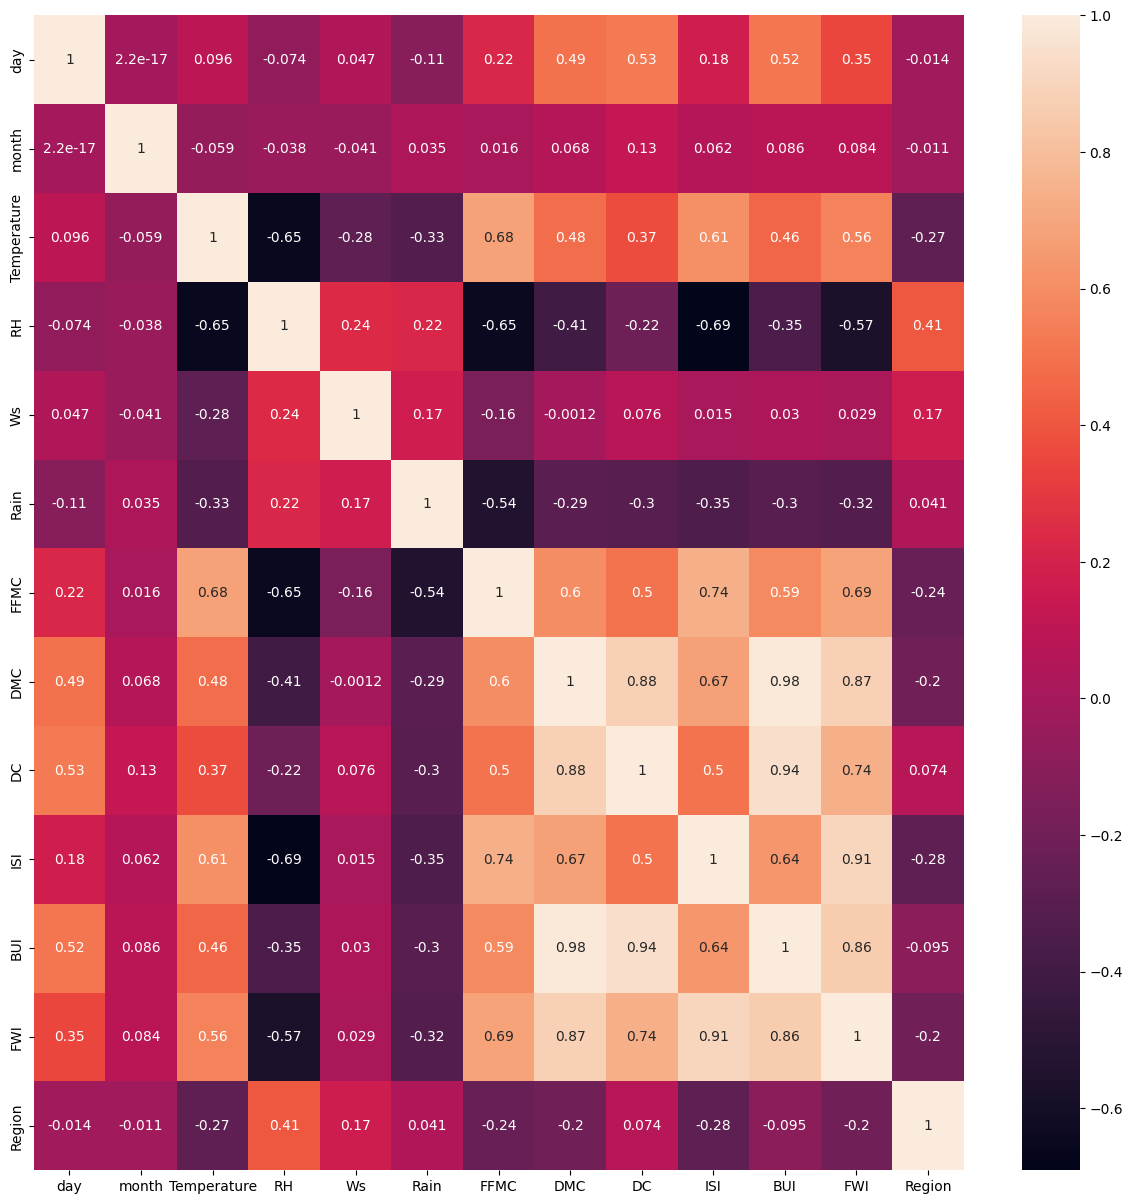

In [54]:
#graphical representation of the corelation
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),annot = True)

## observation
# we have corelation of BUI-DC,FWI-ISI, BUI-DMC

In [56]:
#checking whether classes data is balanced or imbalanced
data['Classes'].value_counts()

fire        140
not fire    104
Name: Classes, dtype: int64

In [57]:
data['Classes'].value_counts()/len(data['Classes'])*100

fire        57.377049
not fire    42.622951
Name: Classes, dtype: float64

## our data is balanced

In [60]:
#encoding the data with one hot code technique
encoded_dataset = pd.get_dummies(data,columns = ['Classes'],drop_first = True)

In [61]:
encoded_dataset

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [81]:
X = encoded_dataset[['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']]
Y = encoded_dataset['Classes_not fire']

In [82]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [84]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes_not fire, dtype: uint8

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


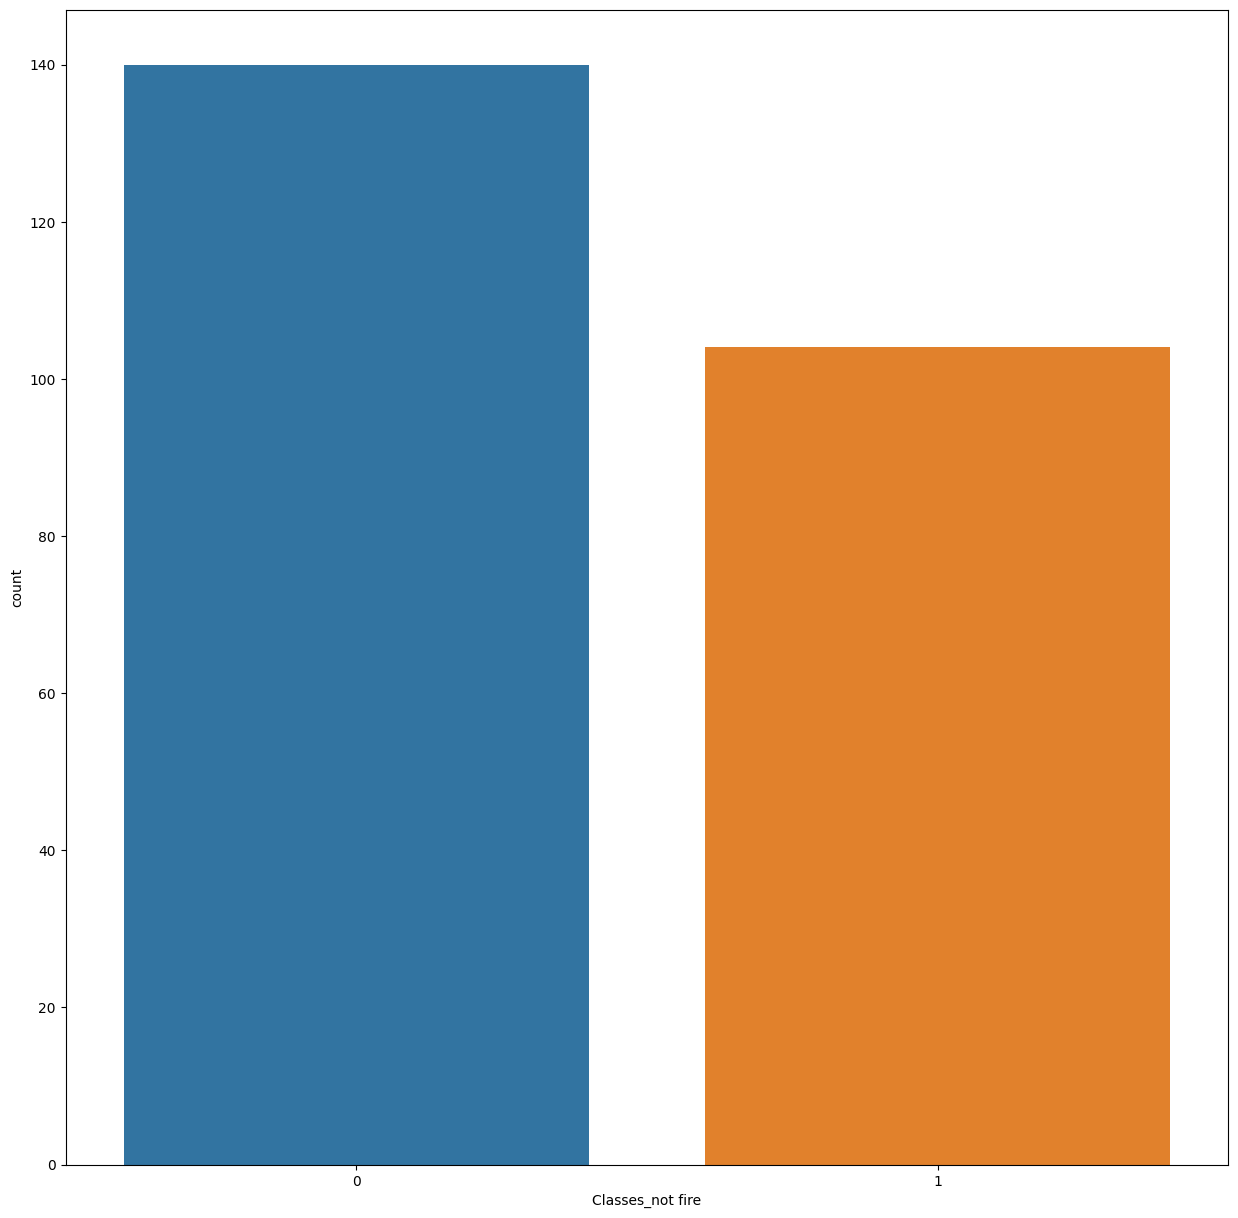

In [94]:
plt.figure(figsize = (15,15))
sns.countplot(encoded_dataset['Classes_not fire'])
plt.show()

## checking outliers

<AxesSubplot:>

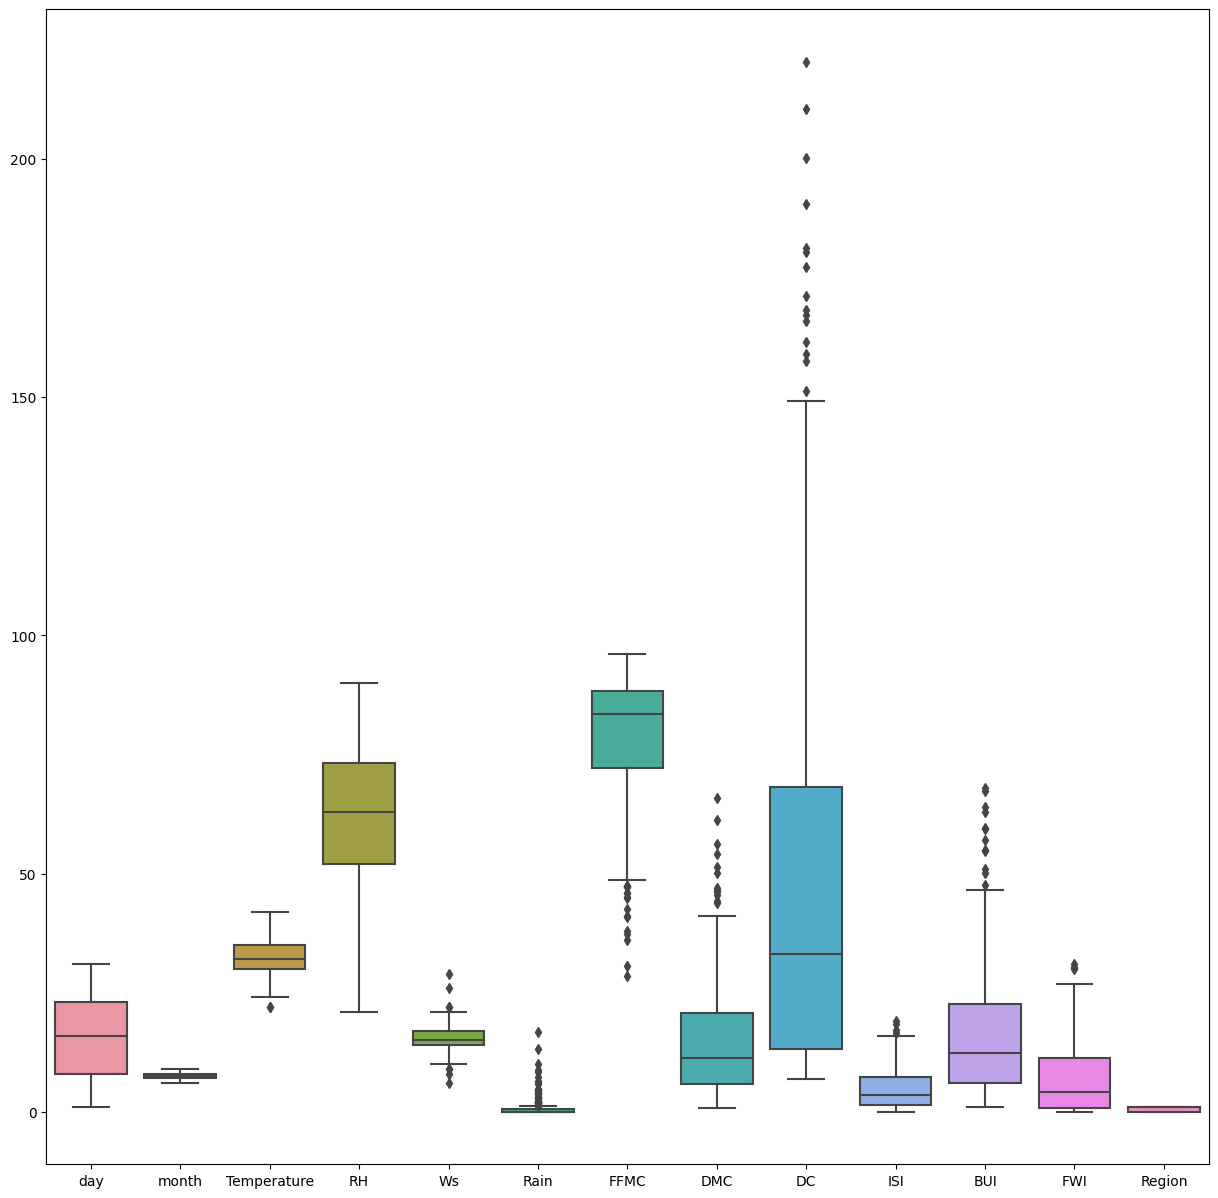

In [102]:
plt.figure(figsize = (15,15))
sns.boxplot(data = X)

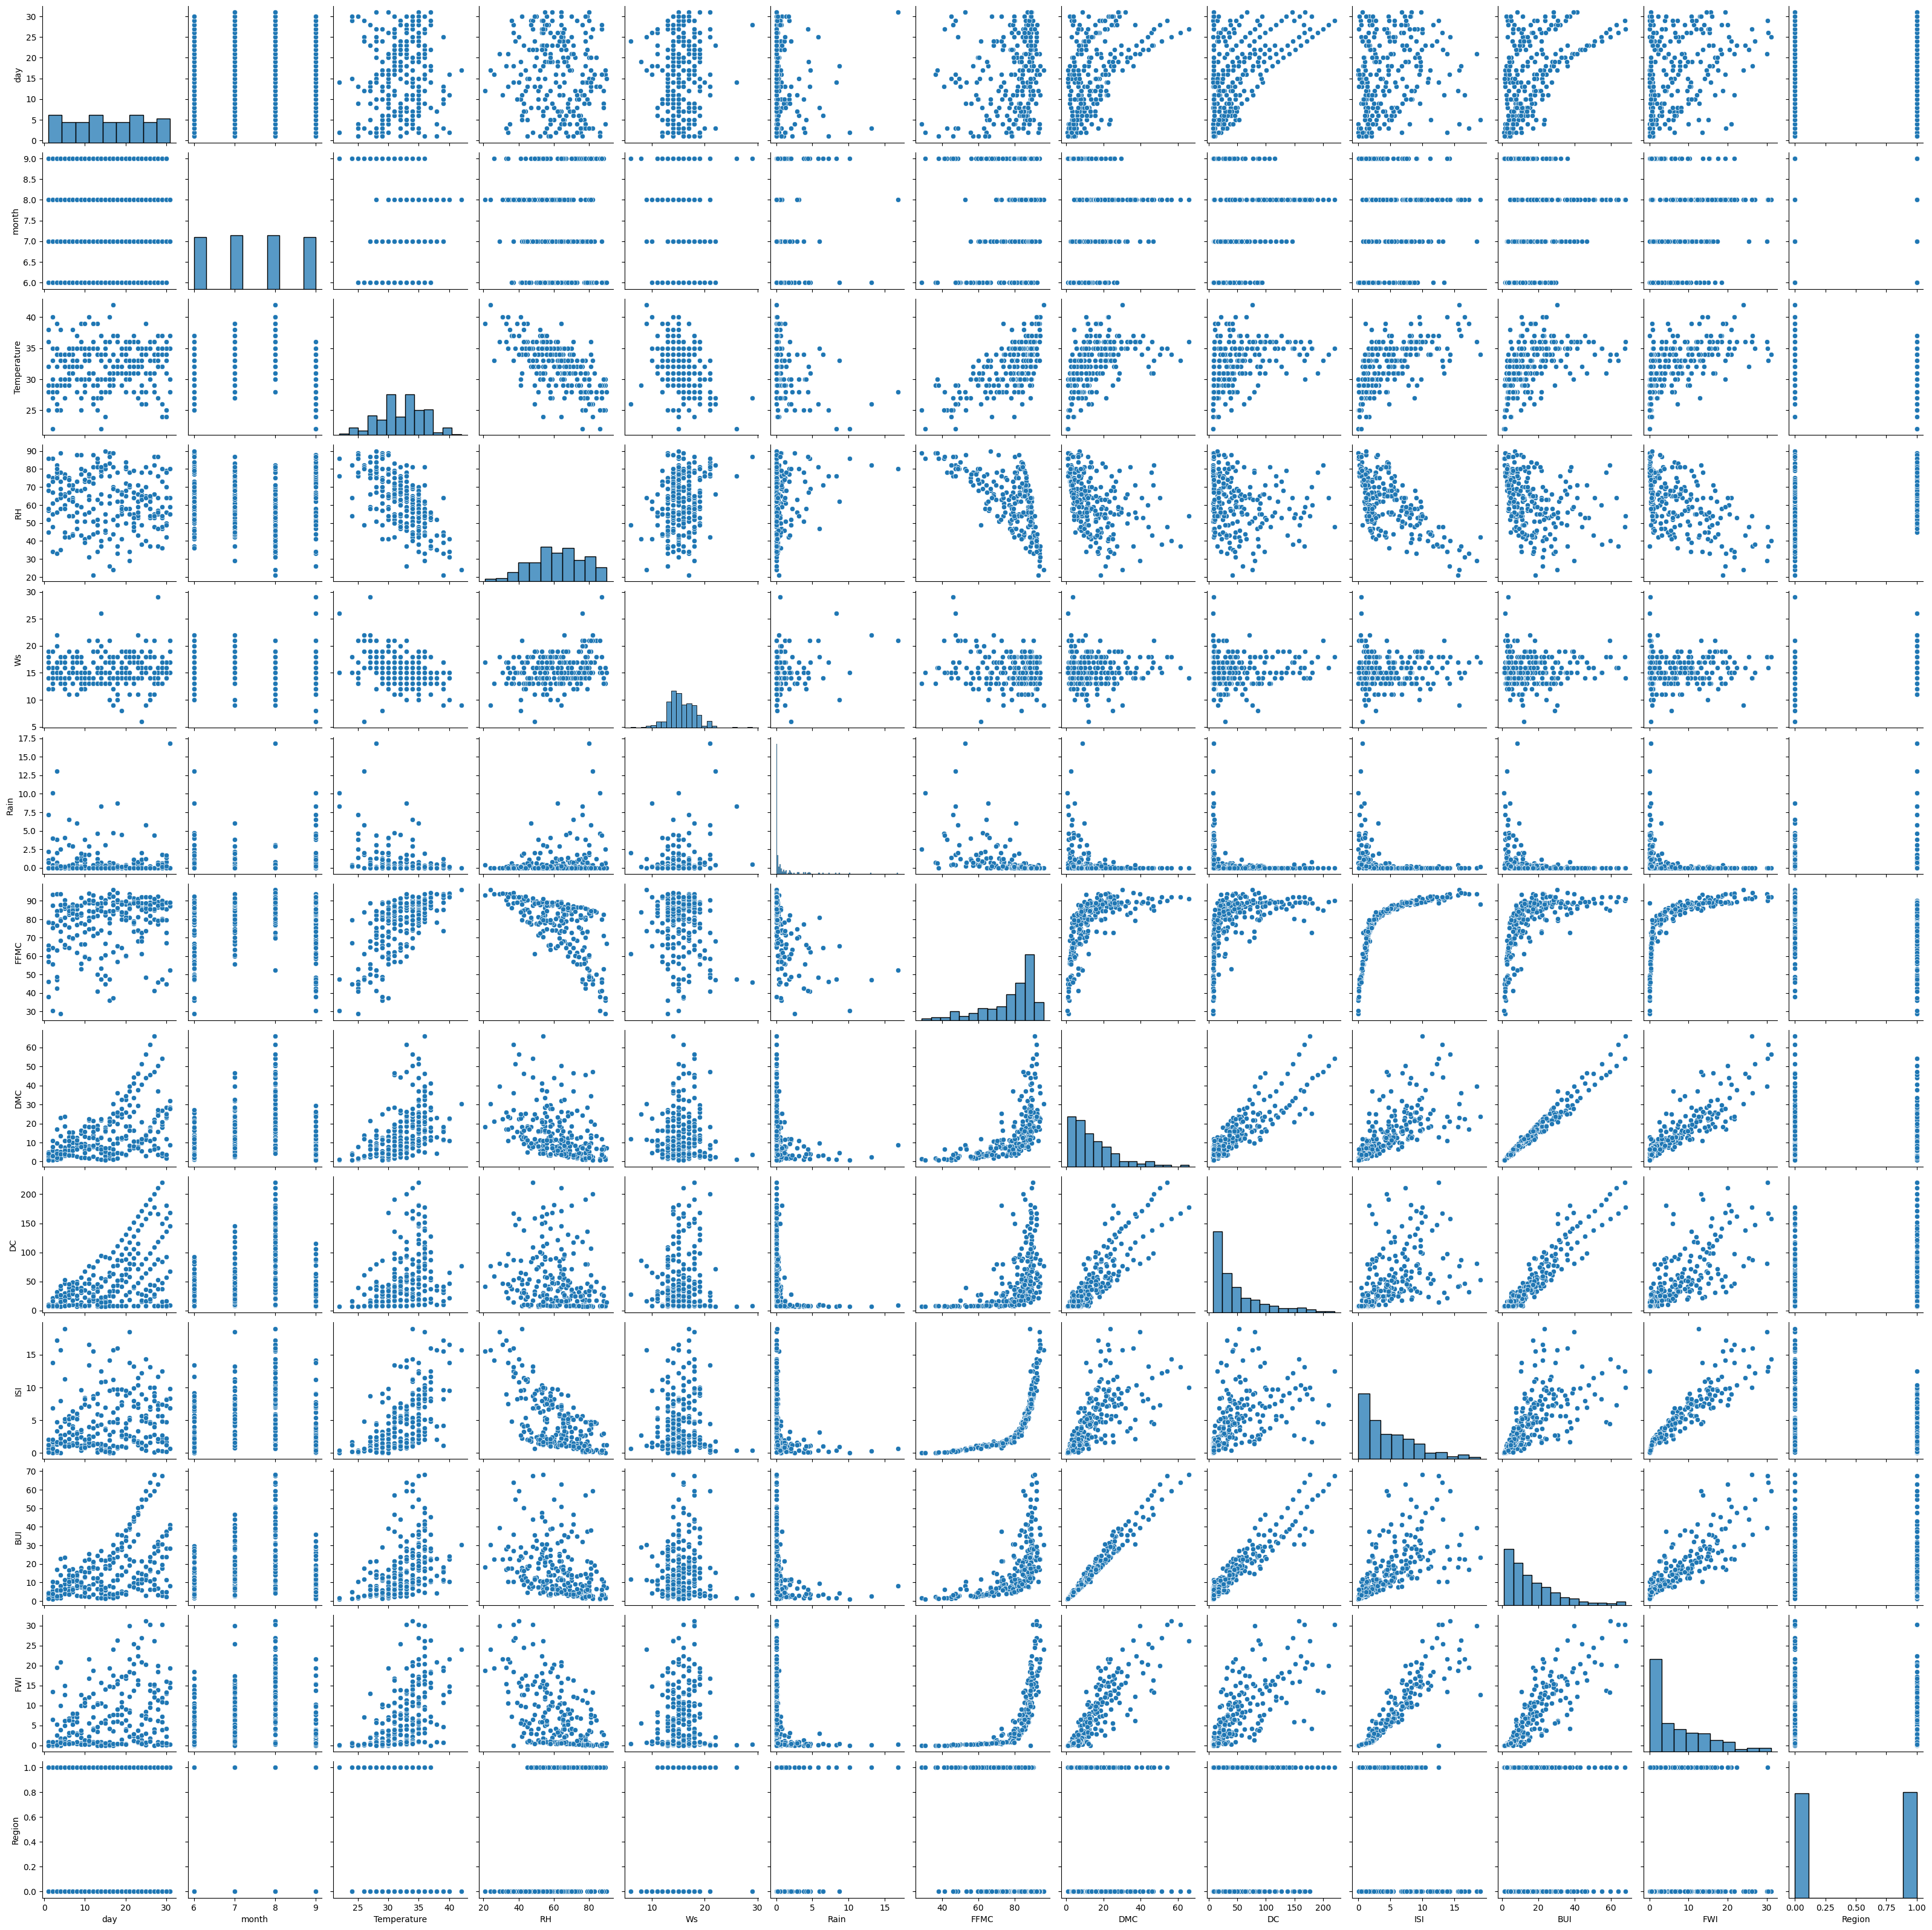

In [132]:
sns.pairplot(data = X)

## Rain and DC has more outliers

## Model Training

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33)

In [108]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
143,22,6,33,46,14,1.1,78.3,8.1,8.3,1.9,7.7,1.2,0
136,15,6,28,90,15,0.0,66.8,7.2,14.7,1.2,7.1,0.6,0
34,5,7,33,66,14,0.0,85.9,7.6,27.9,4.8,9.1,4.9,1
179,28,7,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0,0
229,16,9,33,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,0


In [109]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
153,2,7,33,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,0
144,23,6,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
226,13,9,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,0
227,14,9,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,5.7,0
130,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,0


In [111]:
Y_train.head()

143    1
136    1
34     0
179    0
229    0
Name: Classes_not fire, dtype: uint8

In [112]:
X_train.shape

(163, 13)

In [113]:
X_test.shape

(81, 13)

In [114]:
Y_train.shape

(163,)

In [115]:
Y_test.shape

(81,)

In [117]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [118]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
#training the model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

In [120]:
log_regression.fit(X_train,Y_train)

LogisticRegression()

In [122]:
log_prediction = log_regression.predict(X_test)

In [123]:
log_prediction

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [124]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [127]:
cof_mat = confusion_matrix(Y_test,log_prediction)
cof_mat

array([[44,  2],
       [ 2, 33]])

In [129]:
tp = cof_mat[0][0]
fp = cof_mat[0][1]
fn = cof_mat[1][0]
tn = cof_mat[1][1]
print(tp,fp,fn,tn)

44 2 2 33


In [130]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
accuracy

0.9506172839506173

## As data is balanced and we got the Accuracy of 95%
# which means whatever the prediction we have done. in that 95% values is predicted correct